In [1]:
import pandas as pd
import numpy as np


from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
data = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/GlucoCheck/Data/Hall/Hall_data.csv')
meta = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/GlucoCheck/Data/Hall/Hall_meta.csv')

trainSubjects = ['1636-69-001','1636-69-001-2','1636-69-091','2133-004','2133-018','2133-039'
                 '1636-69-026','1636-69-032','1636-69-090','1636-69-114','1636-70-1005','1636-70-1010'
                 '1636-69-028','1636-69-035','1636-69-048','1636-69-053','1636-69-060','1636-69-064'
                '2133-039','1636-70-1010','1636-69-064']

testSubjects = ['2133-039','1636-70-1010','1636-69-064']

In [37]:
tsdata = []
for subjectId, d in data.groupby('subjectId'):
    l = []
    l.append(subjectId)

    for gv in d.GlucoseValue:
        l.append(gv)
    tsdata.append(l[:580])

tsdf = pd.DataFrame.from_records(tsdata)
# tsdf = tsdf.set_index([0],drop=True)

tsdf['Y'] = meta['status'].tolist()
# tsdf['Y'] = tsdf['Y'].map({'diabetic': 0, 'pre-diabetic': 1, 'non-diabetic': 2})


trainingSet = tsdf.loc[tsdf[0].isin(trainSubjects)]
testingSet = tsdf.loc[tsdf[0].isin(testSubjects)]

trainingSet = trainingSet.set_index([0],drop=True)
testingSet = testingSet.set_index([0],drop=True)

In [38]:
# trainingSet.to_csv('~/Desktop/ClusteringTraining.csv')
trainingSet

,1,2,3,4,5,6,7,8,9,10,...,571,572,573,574,575,576,577,578,579,Y
0,,,,,,,,,,,,,,,,,,,,,
1636-69-001,93,93,93,95,96,95,95,95,96,97,...,92,92,91,91,91,92,97,101,101,diabetic
1636-69-001-2,100,111,113,114,116,121,125,137,143,148,...,123,127,139,148,154,158,157,156,148,diabetic
1636-69-032,122,123,124,128,133,137,132,131,126,122,...,113,113,112,115,124,128,130,131,133,pre-diabetic
1636-69-035,112,110,105,104,104,101,99,100,105,104,...,103,113,116,122,124,123,124,127,130,non-diabetic
1636-69-048,90,88,87,87,88,83,82,74,77,83,...,90,90,95,95,91,95,99,101,100,non-diabetic
1636-69-053,65,65,55,51,43,57,66,89,114,124,...,110,112,115,114,111,108,108,107,106,non-diabetic
1636-69-060,121,108,112,121,121,116,106,109,114,118,...,134,131,130,125,122,123,125,125,125,non-diabetic
1636-69-064,93,86,90,86,94,90,87,85,89,93,...,100,105,108,107,110,108,98,92,87,non-diabetic
1636-69-090,79,75,72,75,80,82,80,78,78,76,...,80,66,62,69,69,84,83,84,83,pre-diabetic


In [39]:
# testingSet.to_csv("~/Desktop/ClusteringTest.csv")
testingSet

,1,2,3,4,5,6,7,8,9,10,...,571,572,573,574,575,576,577,578,579,Y
0,,,,,,,,,,,,,,,,,,,,,
1636-69-064,93,86,90,86,94,90,87,85,89,93,...,100,105,108,107,110,108,98,92,87,non-diabetic
1636-70-1010,91,97,104,111,114,116,120,119,117,119,...,109,103,97,94,92,94,96,97,97,pre-diabetic
2133-039,129,111,105,102,99,103,100,99,99,100,...,98,96,96,96,96,96,95,95,95,diabetic


In [40]:
X_train = trainingSet.drop(['Y'], axis=1)
y_train = trainingSet['Y']

X_test = testingSet.drop(['Y'], axis=1)
y_test = testingSet['Y']

In [41]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [42]:
y_pred, y_test

(array(['non-diabetic', 'pre-diabetic', 'pre-diabetic'], dtype=object), 0
 1636-69-064     non-diabetic
 1636-70-1010    pre-diabetic
 2133-039            diabetic
 Name: Y, dtype: object)

In [43]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [44]:
adjusted_rand_score(y_test, y_pred)

0.0

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



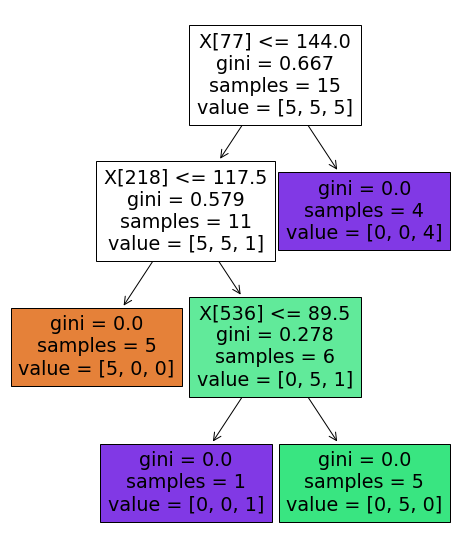

In [47]:
from matplotlib import pyplot as plt 
from sklearn import tree
fig = plt.figure(figsize=(8,10))
_ = tree.plot_tree(clf, 
                 
                   filled=True)

In [48]:
cn=['diabetic', 'pre-diabetic', 'non-diabetic']

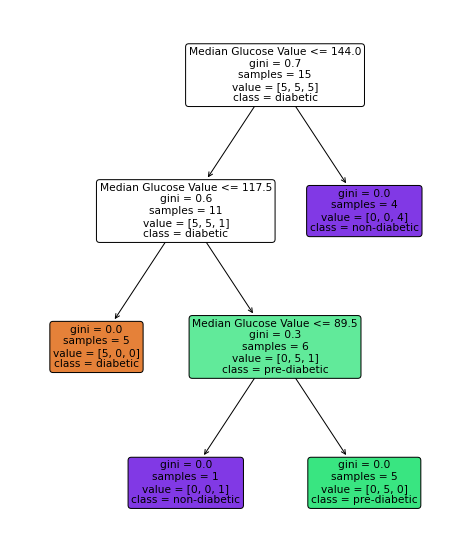

In [61]:
fig = plt.figure(figsize=(8,10))
tree.plot_tree(clf,class_names=cn, feature_names=l,
               filled = True,
               rounded=True,
               precision=True,
               
              );

In [60]:
n = len(testingSet.columns)-1
l = ['Median Glucose Value'] * n